# Linear Regression Model

## Import Libraries

In [55]:
# Import necessary libraries
import numpy as np  # For numerical operations and matrix computations
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn import datasets  # To create or load standard datasets
import matplotlib.pyplot as plt  # For data visualization

## Create Dataset

In [56]:
# Generate a dataset for linear regression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

## Split Dataset

In [57]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Visualize the Dataset

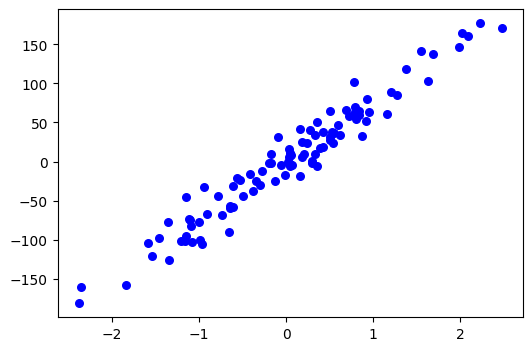

In [58]:
# Visualize the generated dataset
fig = plt.figure(figsize=(6, 4))  # Set the figure size for better visualization
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)  # Scatter plot with blue circles
plt.show()  # Display the plot


## Print Dataset Shapes

In [59]:
# Print the shape of training data to understand dimensions
print(x_train.shape)  # Output: (80, 1) - 80 training samples, 1 feature
print(y_train.shape)  # Output: (80,) - 80 corresponding target values

(80, 1)
(80,)


## Define the Linear Regression Class

## Initialize and Train the Model

In [60]:
# Add the src directory to sys.path if needed
import sys
import os

module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Now you can import your LinearRegression class
from linear_regression import LinearRegression

# Initialize and train the LinearRegression model
regressor = LinearRegression(lr=0.01)  # Create a LinearRegression object with a learning rate of 0.01
regressor.fit(x_train, y_train)  # Train the model using the training data


## Make Predictions on Test Data

In [61]:
# Make predictions on the test data
predicted = regressor.predict(x_test)  # Predict target values for the test data

## Define Mean Squared Error (MSE) Function

In [62]:
# Define a function to calculate the Mean Squared Error (MSE)
def mse(y_true, y_predicted):
    """
    Compute the Mean Squared Error (MSE) between true and predicted values.
    y_true: Actual target values
    y_predicted: Predicted target values by the model
    Returns: Mean Squared Error (float)
    """
    return np.mean((y_true - y_predicted) ** 2)

## Calculate MSE on Test Set

In [63]:
# Calculate and print the Mean Squared Error on the test set
mse_value = mse(y_test, predicted)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 305.7719958301902


## Visualize the Regression Line

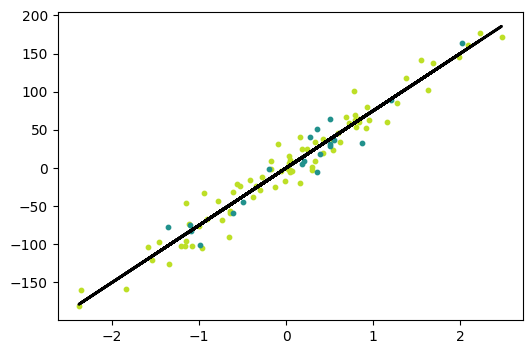

In [64]:
# Visualize the model's predictions

# Make predictions over the entire dataset to plot the regression line
y_predict_line = regressor.predict(X)

# Create a plot to visualize the regression line along with training and test data
cmap = plt.get_cmap('viridis')  # Set the color map for scatter plot colors
fig = plt.figure(figsize=(6, 4))  # Set the figure size for the plot
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)  # Plot training data
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)  # Plot test data
plt.plot(X, y_predict_line, color='black', linewidth=2, label='Prediction')  # Plot regression line
plt.show()  # Display the plot


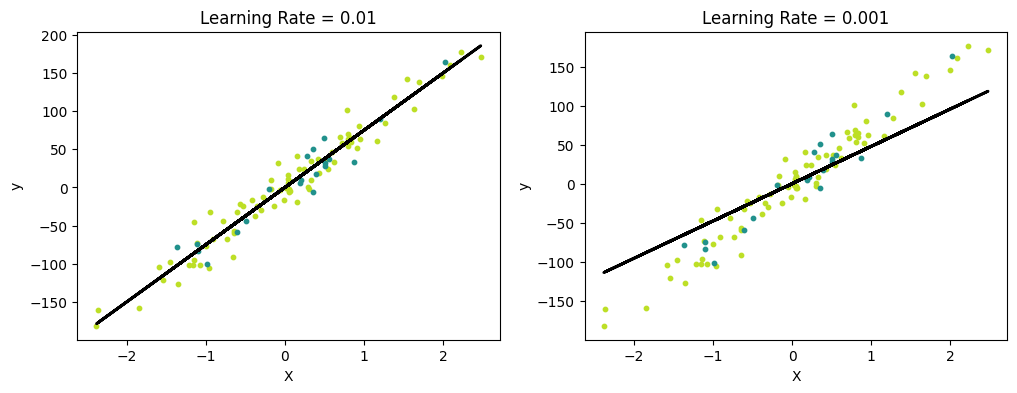

In [65]:
# Visualize the model's predictions with two different learning rates (0.01 and 0.001)

# Create a LinearRegression model with lr = 0.01 and fit the model
regressor_01 = LinearRegression(lr=0.01)
regressor_01.fit(x_train, y_train)
y_predict_line_01 = regressor_01.predict(X)  # Make predictions for plotting

# Create a LinearRegression model with lr = 0.001 and fit the model
regressor_001 = LinearRegression(lr=0.001)
regressor_001.fit(x_train, y_train)
y_predict_line_001 = regressor_001.predict(X)  # Make predictions for plotting

# Set the color map for scatter plot colors
cmap = plt.get_cmap('viridis')

# First plot with learning rate = 0.01
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Create two subplots

# Plot 1: Learning rate = 0.01
ax1.scatter(x_train, y_train, color=cmap(0.9), s=10)  # Plot training data
ax1.scatter(x_test, y_test, color=cmap(0.5), s=10)  # Plot test data
ax1.plot(X, y_predict_line_01, color='black', linewidth=2, label='Prediction (lr=0.01)')  # Plot regression line
ax1.set_title('Learning Rate = 0.01')
ax1.set_xlabel('X')
ax1.set_ylabel('y')

# Plot 2: Learning rate = 0.001
ax2.scatter(x_train, y_train, color=cmap(0.9), s=10)  # Plot training data
ax2.scatter(x_test, y_test, color=cmap(0.5), s=10)  # Plot test data
ax2.plot(X, y_predict_line_001, color='black', linewidth=2, label='Prediction (lr=0.001)')  # Plot regression line
ax2.set_title('Learning Rate = 0.001')
ax2.set_xlabel('X')
ax2.set_ylabel('y')

plt.show()  # Display both plots
